In [1]:
from train import *
import matplotlib.pyplot as plt
import PIL.Image as Image
from utils import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## 1 - initial model

We used this [repository](https://github.com/Booritas/semantic-segmentation) as a base for our initial model. Initial model is not very good - we get the following results:

`Image File: 
File irudyak-7535.tif
Method description: 
First submission from my own keras model.
Submission Status: 
Scored
Rand Score Thin: 
0.837005210
Information Score Thin: 
0.943429268`

At least we have a room for improvements.

In [2]:
experiment_dir=Path('experiments/initial_model')
trainer = Trainer(experiment_dir=experiment_dir)

In [3]:
trainer.params.dict

{'learning_rate': 0.001,
 'input_shape': [512, 512, 1],
 'loss': 'binary_crossentropy',
 'steps_per_epoch': 100,
 'epochs': 25,
 'batch_size': 4,
 'start_epoch': 0,
 'last_step': 10,
 'padding': 'same',
 'batch_size_val': 1,
 'validation_steps': 3,
 'batch_size_test': 1}

In [4]:
!ls experiments/initial_model/

copy.sh
events.out.tfevents.1572186356.instance-2-gpu
params.json
test-volume-masks.tif
weights.10-0.91.hdf5
weights.30-0.91.hdf5


Let's try to predict mask on one of the validation images.

In [5]:
# image 25 was on validation set for initial model
img_arr = trainer.dataset.image_data[25]
mask_arr = trainer.dataset.mask_data[25] / 255.

In [6]:
weight_file = str(experiment_dir / 'weights.10-0.91.hdf5')
mask_pred = trainer.predict_image(img_arr, weight_file)

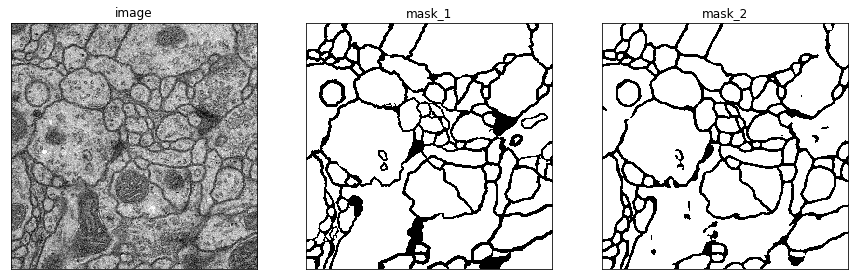

In [7]:
plot_masks(img_arr, [mask_arr, mask_pred])

In [10]:
f1_score(mask_arr.reshape(-1), mask_pred.reshape(-1), pos_label=0)

0.8134227368463894

## 2 - model with custom loss

Here're main changes in this model: 

- we changed metric to `dice_coef` (that's `f1` score in case of binary tensors); this is popular choice for segmentation (we have much more white color than the black one); we have to compute it properly - first flip an then compute dot product;
- we changed loss function to the sum of `binary crossentropy` and `dice loss` - popular function for segmentation tasks;
- we expanded the validation set;
- we added `EarlyStopping` callback;

But we don't see any significant increase in accuracy. So we don't even submit results.

In [13]:
experiment_dir=Path('experiments/custom_metric')
trainer = Trainer(experiment_dir=experiment_dir)

In [14]:
trainer.params.dict

{'learning_rate': 0.001,
 'input_shape': [512, 512, 1],
 'steps_per_epoch': 100,
 'epochs': 40,
 'batch_size': 4,
 'start_epoch': 0,
 'last_step': 10,
 'padding': 'same',
 'batch_size_val': 1,
 'validation_steps': 3,
 'batch_size_test': 1}

In [16]:
!ls experiments/custom_metric/

copy.sh
events.out.tfevents.1572281543.instance-2-gpu
params.json
weights.07-0.42.hdf5


In [17]:
# image 25 was on validation set for this model
img_arr = trainer.dataset.image_data[25]
mask_arr = trainer.dataset.mask_data[25] / 255.

In [19]:
weight_file = str(experiment_dir / 'weights.07-0.42.hdf5')
mask_pred = trainer.predict_image(img_arr, weight_file)

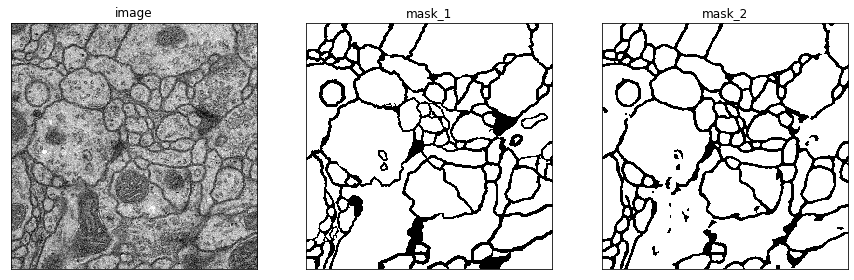

In [20]:
plot_masks(img_arr, [mask_arr, mask_pred])

In [21]:
f1_score(mask_arr.reshape(-1), mask_pred.reshape(-1), pos_label=0)

0.8119151774329602